In [64]:
%load_ext autoreload
%autoreload 2

In [234]:
from wdtools import *

In [2]:
# this can take about 7 minutes
start = time.time()
all_taxlot = combine_taxlot()
end = time.time()
print(f'it took {round((end - start)/60, 0)} minutes to complete')

it took 7.0 minutes to complete


In [3]:
all_taxlot.shape

(9043030, 3)

In [4]:
all_taxlot.head(3)

,year,ORTaxlot,geometry
0,2017,,"MULTIPOLYGON (((762282.329 1368122.698, 762282..."
1,2017,0 .00.000000--0000,"MULTIPOLYGON (((486021.516 1375588.457, 485872..."
2,2017,0 .00.000000--000000000,"MULTIPOLYGON (((458567.232 1386372.520, 458625..."


In [5]:
setID = 'Set003'

In [6]:
nm_to_add = 2143

In [7]:
setdf = combined_reindexed_data(setID=setID, nm_to_add=nm_to_add) 

In [196]:
# export = False
setgdf = match_wd_data_with_taxlot(df=setdf, setID=setID, all_taxlot=all_taxlot, export=True)

In [9]:
setgdf.shape

(1451, 31)

In [10]:
setgdf.tail(3)

,wdID,trsqq,parcel_id,loc_desc,city,county,site_name,site_desc,latitude,longitude,...,notes,lots,lot,cnt_code,ORTaxlot,recyear,IDyear,missinglot,record_ID,geometry
1448,WD2022-0282,02N10W32CC,15400,"E of Anchor, W of Beacon, S of 2nd",Rockaway Beach,Tillamook,Anchor St Parking,WD2022-0282 delin,45.610690,-123.943200,...,,15400,15400,29,2902.00N10.00W32CC--000015400,2022,2022,N,2874,"MULTIPOLYGON (((431371.981 1425925.868, 431396..."
1449,WD2022-0283,02N10W32CC,19000,S 2nd and Coral St,Rockaway Beach,Tillamook,King new home site,WD2022-0283 offsite wetdet,45.611295,-123.941950,...,,19000,19000,29,2902.00N10.00W32CC--000019000,2022,2022,N,2875,"MULTIPOLYGON (((431751.006 1426009.481, 431749..."
1450,WD2022-0296,03N10W29DA,2600,698 Dorcas Ln,Manzanita,Tillamook,Vito Cerelli,WD2022-0296 Offsite WetDet,45.717572,-123.929596,...,,2600,2600,29,2903.00N10.00W29DA--000002600,2022,2022,N,2877,"MULTIPOLYGON (((436509.445 1464585.791, 436447..."


In [11]:
wd = combine_wd_tables(setID=setID, nm_to_add=nm_to_add)

In [12]:
wd.shape

(735, 25)

In [13]:
wd.head(3)

,wetdet_delin_number,trsqq,parcel_id,address_location_desc,city,county,site_name,site_desc,latitude,longitude,...,received_date,response_date,reissuance_response_date,project_id,site_id,record_ID,notes,recyear,IDyear,missinglot
0,WD2017-0028,04N01W09BB,100,"E of Hwy 30, N of Gable Rd",St Helens,Columbia,Gable Rd 04N01W09BB,NaN,45.847920,-122.823410,...,2017-01-20,2017-03-01,NaN,NaN,104151,2144,,2017,2017,N
1,WD2017-0038,03N02W12BD,"1000,1100,1300",NaN,Scappoose,Columbia,Seely Ln Park Proj 03N02W12BD,Seely Lane Park Project (grant),45.758370,-122.882498,...,2017-02-01,2017-02-22,NaN,NaN,104260,2145,,2017,2017,N
2,WD2017-0076,04N01W05CD,2102,"2480 Gable Rd, St Helens",St Helens,Columbia,04N01W05CD,NaN,45.851632,-122.836404,...,2017-02-24,2017-03-02,NaN,NaN,104533,2146,,2017,2017,N


In [14]:
wd.county.unique()

array(['Columbia', 'Grant', 'Klamath', 'Lincoln', 'Tillamook',
       'TIllamook'], dtype=object)

In [15]:
wd.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'address_location_desc',
       'city', 'county', 'site_name', 'site_desc', 'latitude', 'longitude',
       'Coord-Source', 'DocumentName', 'DecisionLink', 'is_batch_file',
       'status_name', 'received_date', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'record_ID',
       'notes', 'recyear', 'IDyear', 'missinglot'],
      dtype='object')

In [16]:
unmatched_df = report_unmatched(gdf=setgdf, setID=setID, nm_to_add=nm_to_add, mute = False)

it is about 11.43% of data in the original 735 records unmatched
there are 0 records (0.0% of the original records) without parcel id


In [39]:
unmatched_df.missinglot.unique()

array(['N', 'Y'], dtype=object)

In [17]:
unmatched_df.to_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}.csv'), index=False) 

In [18]:
r1_df, r2_df = split_unmatched_df(unmatched_df, ml='N', setID=setID)

In [231]:
rev_r2 = review_unmatched_df_r2(df=r2_df, taxlot=all_taxlot, setID=setID, ml='N', export=True)

reviewing WD2021-0192
there is not any matched lot, need to review trsqq, the close-match is 06S11W34AD
lots to check: ['106'], and lots to compare: ['100', '200', '300', '400', '500', '600', '700', '800', '900', '1000', '1100', '1200', '1300', '1400', '1500', '1600', '1700', '1800', '1900', '2000', '2100', '2200', '2300', '2400', '2500', '2600', '2700', '2800', '2900', '3000', '3100', '3200', '3300', '3400', '3500', '3700', '3800', '3900', '4000', '4100', '4200', '4300', '4400', '4401', '4500', '4600', '4700', '4800', '4900', '5000', '5100', '5200', '5300', '5400', '5500', '5501', 'ROADS', 'ROADS']
reviewing WD2017-0214
all lots are matched...
corrected trsqq...
reviewing WD2022-0018
all lots are matched...
corrected trsqq...
reviewing WD2019-0512
all lots are matched...
corrected trsqq...
reviewing WD2020-0261
all lots are matched...
corrected trsqq...
reviewing WD2017-0177
all lots are matched...
corrected trsqq...
reviewing WD2017-0267
all lots are matched...
corrected trsqq...
rev

In [167]:
# need to review the notes
cor_r1 = correct_unmatched(r1_df, setID, s='r1', ml='N', export=True)

In [133]:
cor_r2 = correct_unmatched(r2_df, setID, s='r2', ml='N', export=True)

In [109]:
r2_df.trsqq.values

array(['06S11W35C', '05N02W27', '33S07E03', '33S07E00', '7S11W22CD',
       '05N01W34CD', '07N02W17CC', '24S09E00', '03S10W18', '33S07E03'],
      dtype=object)

In [134]:
cor_r2.trsqq.values

array(['06S11W35CB', '07N02W08CC', '24S09E30CD'], dtype=object)

In [143]:
cor_r2_2 = update_unmatched_df_r2(r2_df, setID, ml='N', export=True)

In [168]:
# make sure the notes are updated
df = combine_corrected_unmatched(setID, ml='N')

In [82]:
len(df.record_ID.unique())

50

In [83]:
df.shape

(50, 25)

In [24]:
df.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'address_location_desc',
       'city', 'county', 'site_name', 'site_desc', 'latitude', 'longitude',
       'Coord-Source', 'DocumentName', 'DecisionLink', 'is_batch_file',
       'status_name', 'received_date', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'record_ID',
       'notes', 'recyear', 'IDyear', 'missinglot'],
      dtype='object')

In [169]:
rev_df = reindex_data(df)

In [175]:
def adjust_taxlot(x, from_, to_):
    return x.replace(from_, to_)

In [176]:
adjust_taxlot('2018.00S12.00W02C0--000005700', '--0', '--T')

'2018.00S12.00W02C0--T00005700'

In [179]:
adj_df = rev_df[rev_df.wetdet_delin_number == 'WD2022-0136']

In [180]:
adj_df.loc[:, 'ORTaxlot'] = adj_df.copy()['ORTaxlot'].apply(lambda x: adjust_taxlot(x, '--0', '--T'))

In [182]:
rev_df = adj_df.append(rev_df[rev_df.wetdet_delin_number != 'WD2022-0136'], ignore_index=True)

In [183]:
rev_df.shape

(178, 29)

In [198]:
# make sure the matched data before update is correct
matched = match_wd_data_with_taxlot(rev_df, setID, all_taxlot, export=True, update=True)

In [41]:
matched.columns

Index(['wdID', 'trsqq', 'parcel_id', 'notes', 'lots', 'lot', 'ORTaxlot',
       'record_ID', 'geometry'],
      dtype='object')

In [184]:
test = match_wd_data_with_taxlot(rev_df, setID, all_taxlot, export=False, update=False)

In [48]:
test.columns

Index(['wdID', 'trsqq', 'parcel_id', 'loc_desc', 'city', 'county', 'site_name',
       'site_desc', 'latitude', 'longitude', 'coord_src', 'doc_name',
       'doc_link', 'isbatfile', 'status_nm', 'receiveddt', 'responsedt',
       'reissuance', 'project_id', 'site_id', 'record_ID', 'notes', 'recyear',
       'IDyear', 'missinglot', 'lots', 'lot', 'cnt_code', 'ORTaxlot',
       'geometry'],
      dtype='object')

In [213]:
test2 = review_WD_record_via_Pro(gdf=test, wdID='WD2022-0136')

<AxesSubplot:>

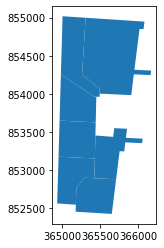

In [214]:
test2.plot()

In [212]:
test[test.wdID == 'WD2020-0663']

,wdID,trsqq,parcel_id,loc_desc,city,county,site_name,site_desc,latitude,longitude,...,record_ID,notes,recyear,IDyear,missinglot,lots,lot,cnt_code,ORTaxlot,geometry
140,WD2020-0663,08N04W21,"600p,700p,ROW",NaN,Clatskanie,Columbia,NEXT Renewable Fuels Oregon,WD2020-0663 Construct a renewable diesel facil...,46.16567,-123.161744,...,2265,"ROW, Partial",2020,2020,N,"600, 700, ROADS",600,5,0508.00N04.00W2100--000000600,"MULTIPOLYGON (((634054.405 1620182.112, 634054..."
141,WD2020-0663,08N04W21,"600p,700p,ROW",NaN,Clatskanie,Columbia,NEXT Renewable Fuels Oregon,WD2020-0663 Construct a renewable diesel facil...,46.16567,-123.161744,...,2265,"ROW, Partial",2020,2020,N,"600, 700, ROADS",700,5,0508.00N04.00W2100--000000700,"MULTIPOLYGON (((633471.990 1622770.493, 633662..."
142,WD2020-0663,08N04W16,"200p,300p",NaN,Clatskanie,Columbia,NEXT Renewable Fuels Oregon,WD2020-0663 Construct a renewable diesel facil...,46.16567,-123.161744,...,2266,Partial,2020,2020,N,"200, 300",200,5,0508.00N04.00W1600--000000200,"MULTIPOLYGON (((634244.686 1625749.692, 634232..."
143,WD2020-0663,08N04W16,"200p,300p",NaN,Clatskanie,Columbia,NEXT Renewable Fuels Oregon,WD2020-0663 Construct a renewable diesel facil...,46.16567,-123.161744,...,2266,Partial,2020,2020,N,"200, 300",300,5,0508.00N04.00W1600--000000300,"MULTIPOLYGON (((634141.906 1622742.364, 633662..."
144,WD2020-0663,08N04W15,"100,200,300,400,All part",NaN,Clatskanie,Columbia,NEXT Renewable Fuels Oregon,WD2020-0663 Construct a renewable diesel facil...,46.16567,-123.161744,...,2262,Partial,2020,2020,N,"100, 200, 300, 400",100,5,0508.00N04.00W1500--000000100,"MULTIPOLYGON (((637999.587 1623340.363, 637914..."
145,WD2020-0663,08N04W15,"100,200,300,400,All part",NaN,Clatskanie,Columbia,NEXT Renewable Fuels Oregon,WD2020-0663 Construct a renewable diesel facil...,46.16567,-123.161744,...,2262,Partial,2020,2020,N,"100, 200, 300, 400",200,5,0508.00N04.00W1500--000000200,"MULTIPOLYGON (((637914.887 1623299.926, 637724..."
146,WD2020-0663,08N04W15,"100,200,300,400,All part",NaN,Clatskanie,Columbia,NEXT Renewable Fuels Oregon,WD2020-0663 Construct a renewable diesel facil...,46.16567,-123.161744,...,2262,Partial,2020,2020,N,"100, 200, 300, 400",300,5,0508.00N04.00W1500--000000300,"MULTIPOLYGON (((638635.418 1622923.538, 638291..."
147,WD2020-0663,08N04W15,"100,200,300,400,All part",NaN,Clatskanie,Columbia,NEXT Renewable Fuels Oregon,WD2020-0663 Construct a renewable diesel facil...,46.16567,-123.161744,...,2262,Partial,2020,2020,N,"100, 200, 300, 400",400,5,0508.00N04.00W1500--000000400,"MULTIPOLYGON (((637724.716 1623209.136, 637914..."
148,WD2020-0663,08N04W23B,"700p,800p,Rails",NaN,Clatskanie,Columbia,NEXT Renewable Fuels Oregon,WD2020-0663 Construct a renewable diesel facil...,46.16567,-123.161744,...,2263,"Partial, Rail",2020,2020,N,"700, 800, RAILS",700,5,0508.00N04.00W23B0--000000700,"MULTIPOLYGON (((640185.379 1620342.704, 640166..."
149,WD2020-0663,08N04W23B,"700p,800p,Rails",NaN,Clatskanie,Columbia,NEXT Renewable Fuels Oregon,WD2020-0663 Construct a renewable diesel facil...,46.16567,-123.161744,...,2263,"Partial, Rail",2020,2020,N,"700, 800, RAILS",800,5,0508.00N04.00W23B0--000000800,"MULTIPOLYGON (((640800.616 1619813.129, 640161..."


In [185]:
missedID = [rID for rID in df.record_ID.values if rID not in test.record_ID.values]

In [186]:
sorted(missedID)

[2437, 2450, 2454]

In [199]:
unmatched_df = report_unmatched(gdf=matched, setID=setID, nm_to_add=nm_to_add, mute = False)

it is about 5.03% of data in the original 735 records unmatched
there are 0 records (0.0% of the original records) without parcel id


In [200]:
unmatched_df.shape

(37, 25)

In [51]:
unmatched_df.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'address_location_desc',
       'city', 'county', 'site_name', 'site_desc', 'latitude', 'longitude',
       'Coord-Source', 'DocumentName', 'DecisionLink', 'is_batch_file',
       'status_name', 'received_date', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'record_ID',
       'notes', 'recyear', 'IDyear', 'missinglot'],
      dtype='object')

In [56]:
unmatched_df[unmatched_df.record_ID == 2803]

,wetdet_delin_number,trsqq,parcel_id,address_location_desc,city,county,site_name,site_desc,latitude,longitude,...,received_date,response_date,reissuance_response_date,project_id,site_id,record_ID,notes,recyear,IDyear,missinglot
659,WD2021-0181,03N10W32A,54069,"Pelican Ln Lot 13, Lot is on the corner of Pel...",Manzanita,Tillamook,Shawn Overstreet,WD2021-0181 Offsite,NaN,NaN,...,2021-04-05,2021-06-14,NaN,81746.0,135726,2803,,2021,2021,N


In [55]:
[rID for rID in unmatched_df.loc[unmatched_df.missinglot=='N', 'record_ID'].values if rID not in missedID]

[2803]

In [188]:
missed_r1_ID = [rID for rID in missedID if rID in r1_df.record_ID.values]

In [189]:
missed_r1_ID

[2437, 2450, 2454]

In [152]:
rev_df.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'address_location_desc',
       'city', 'county', 'site_name', 'site_desc', 'latitude', 'longitude',
       'Coord-Source', 'DocumentName', 'DecisionLink', 'is_batch_file',
       'status_name', 'received_date', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'record_ID',
       'notes', 'recyear', 'IDyear', 'missinglot', 'lots', 'lot', 'cnt_code',
       'ORTaxlot'],
      dtype='object')

In [154]:
r1_df.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'address_location_desc',
       'city', 'county', 'site_name', 'site_desc', 'latitude', 'longitude',
       'Coord-Source', 'DocumentName', 'DecisionLink', 'is_batch_file',
       'status_name', 'received_date', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'record_ID',
       'notes', 'recyear', 'IDyear', 'missinglot'],
      dtype='object')

In [190]:
r1_df.loc[r1_df.record_ID.isin(missed_r1_ID), ['record_ID','trsqq', 'parcel_id','county', 'wetdet_delin_number']]

,record_ID,trsqq,parcel_id,county,wetdet_delin_number
293,2437,39S09W14,200p,Klamath,WD2019-0121
306,2450,39S09W08D,"1500p,1600p",Klamath,WD2019-0121
310,2454,39S09W08C,1300p,Klamath,WD2019-0121


In [191]:
cor_r1.loc[cor_r1.record_ID.isin(missed_r1_ID), ['record_ID','trsqq', 'parcel_id','county', 'wetdet_delin_number']]

,record_ID,trsqq,parcel_id,county,wetdet_delin_number
293,2437,39S09E14,200p,Klamath,WD2019-0121
306,2450,39S09E08D,"1500p,1600p",Klamath,WD2019-0121
310,2454,39S09E08C,1300p,Klamath,WD2019-0121


In [197]:
rev_df.loc[rev_df.record_ID.isin(missed_r1_ID), ['record_ID','ORTaxlot', 'trsqq', 'parcel_id','county', 'wetdet_delin_number']]

,record_ID,ORTaxlot,trsqq,parcel_id,county,wetdet_delin_number
30,2437,1839.00S09.00E1400--000000200,39S09E14,200p,Klamath,WD2019-0121
85,2450,1839.00S09.00E08D0--000001500,39S09E08D,"1500p,1600p",Klamath,WD2019-0121
86,2450,1839.00S09.00E08D0--000001600,39S09E08D,"1500p,1600p",Klamath,WD2019-0121
93,2454,1839.00S09.00E08C0--000001300,39S09E08C,1300p,Klamath,WD2019-0121


In [150]:
missed_r2_ID = [rID for rID in missedID if rID in r2_df.record_ID.values]

In [151]:
missed_r2_ID

[]

In [63]:
rev_r2.record_ID.values

array([2660, 2159, 2537, 2467, 2642, 2155, 2162, 2392, 2777, 2525])

In [61]:
[rID for rID in test.record_ID.values if rID in r2_df.record_ID.values]

[2159, 2642, 2162, 2162, 2162, 2392]

In [42]:
unmatched_df.to_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_2.csv'), index=False)

True

In [29]:
testdf = unmatched_df[unmatched_df.missinglot=='Y']

In [30]:
testdf.shape

(33, 25)

In [31]:
with open(os.path.join(inpath, "ORTaxlot.pkl"), "rb") as f:
    all_txid = pickle.load(f)

In [32]:
row_txid = [txid for txid in all_txid if 'ROADS' in txid]

In [33]:
water_txid = [txid for txid in all_txid if 'WATER' in txid]

In [34]:
rail_txid = [txid for txid in all_txid if 'RAILS' in txid]

In [35]:
testdf.notes.unique()

array(['ROW', 'Rail', 'Many', 'ROW, Rail'], dtype=object)

In [36]:
r1_t, r2_t = split_unmatched_df(unmatched_df, ml='Y', setID=setID)

In [245]:
rev_r2_y = review_unmatched_df_r2(df=r2_t, taxlot=all_taxlot, setID=setID, ml='Y', export=True)

reviewing WD2020-0526
there is not any matched lot, need to review trsqq, the close-match is 02N10W
lots to check: ['ROADS'], and lots to compare: ['100', '200', '600', '1100', '1200', '1900', '2000', '2200', '2280', '2290', '2500', '2700', '2800', '3200', '3300', '3400', '3700', '3800', '3900', '4000', '4400', '4500', '4800', '4900', '5000', '5100', '5201', '5203', '5600', '5700', '5800', '5900', '6000', '6001', '6100', '6101', '99980']
reviewing WD2020-0009
coordinate might be incorrect, nearby taxlot is 0504.00N01.00W03CB--000001900, about 39 ft away
reviewing WD2017-0124
coordinate might be incorrect, nearby taxlot is 1838.00S11.50E3100--000001000, about 27 ft away
reviewing WD2018-0196
trsqq matched, checking county code...
county code is corrected, need to check lot numbers...
lot numbers might be wrong...
reviewing WD2021-0624
there is not any matched lot, need to review trsqq, the close-match is 01S09W30
lots to check: ['RAILS'], and lots to compare: ['100', '101', '102', '103'

In [251]:
testdf = rev_r2_y.copy()

In [254]:
taxlot_to_check = get_taxlot_to_check_r2(revdf=testdf, taxlot=all_taxlot, setID=setID, ml='Y')

In [257]:
taxlot_to_check.columns

Index(['year', 'ORTaxlot', 'geometry', 'wdID', 'trsqq', 'parcel_id', 'county',
       'latitude', 'longitude', 'doc_link', 'record_ID', 'IDyear', 'cor_type',
       'correction', 'cor_trsqq'],
      dtype='object')